# Example: Anscombe's Synthetic data

In [2]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
data(anscombe)
ans <- anscombe
str(ans)

'data.frame':	11 obs. of  8 variables:
 $ x1: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x2: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x3: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x4: num  8 8 8 8 8 8 8 19 8 8 ...
 $ y1: num  8.04 6.95 7.58 8.81 8.33 ...
 $ y2: num  9.14 8.14 8.74 8.77 9.26 8.1 6.13 3.1 9.13 7.26 ...
 $ y3: num  7.46 6.77 12.74 7.11 7.81 ...
 $ y4: num  6.58 5.76 7.71 8.84 8.47 7.04 5.25 12.5 5.56 7.91 ...


In [3]:
ans <- as_tibble(anscombe)
glimpse(ans)

Rows: 11
Columns: 8
$ x1 <dbl> 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5
$ x2 <dbl> 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5
$ x3 <dbl> 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5
$ x4 <dbl> 8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8
$ y1 <dbl> 8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68
$ y2 <dbl> 9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74
$ y3 <dbl> 7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73
$ y4 <dbl> 6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89


In [4]:
ans %>% summarize(mean.x1 = mean(x1),
                 mean.x2 = mean(x2),
                 mean.y1 = mean(y2),
                 mean.y2 = mean(y2))

mean.x1 mean.x2 mean.y1  mean.y2 
1 9       9       7.500909 7.500909

In [5]:
# std
ans %>% summarize(sd.x1 = sd(x1),
                 sd.x2 = sd(x2),
                 sd.x3 = sd(x3),
                 sd.y1 = sd(y1),
                 sd.y2 = sd(y2))

sd.x1    sd.x2    sd.x3    sd.y1    sd.y2   
1 3.316625 3.316625 3.316625 2.031568 2.031657

In [6]:
# regresi linear
mod1 <- lm(y1 ~ x1, data = ans)
mod1


Call:
lm(formula = y1 ~ x1, data = ans)

Coefficients:
(Intercept)           x1  
     3.0001       0.5001  


In [7]:
mod2 <- lm(y2 ~ x2, data = ans)
mod2


Call:
lm(formula = y2 ~ x2, data = ans)

Coefficients:
(Intercept)           x2  
      3.001        0.500  


In [8]:
library(texreg)
texreg(list(mod1, mod2),
      custom.model.names = c("mod1", "mod2"),
      caption = "Regression of y1 on x1 and y2 on x2",
      caption.above = TRUE)

Version:  1.37.5
Date:     2020-06-17
Author:   Philip Leifeld (University of Essex)

Consider submitting praise using the praise or praise_interactive functions.
Please cite the JSS article in your publications -- see citation("texreg").


Attaching package: ‘texreg’


The following object is masked from ‘package:tidyr’:

    extract




\begin{table}
\caption{Regression of y1 on x1 and y2 on x2}
\begin{center}
\begin{tabular}{l c c}
\hline
 & mod1 & mod2 \\
\hline
(Intercept) & $3.00^{*}$  & $3.00^{*}$  \\
            & $(1.12)$    & $(1.13)$    \\
x1          & $0.50^{**}$ &             \\
            & $(0.12)$    &             \\
x2          &             & $0.50^{**}$ \\
            &             & $(0.12)$    \\
\hline
R$^2$       & $0.67$      & $0.67$      \\
Adj. R$^2$  & $0.63$      & $0.63$      \\
Num. obs.   & $11$        & $11$        \\
\hline
\multicolumn{3}{l}{\scriptsize{$^{***}p<0.001$; $^{**}p<0.01$; $^{*}p<0.05$}}
\end{tabular}
\label{table:coefficients}
\end{center}
\end{table}

`geom_smooth()` using formula 'y ~ x'



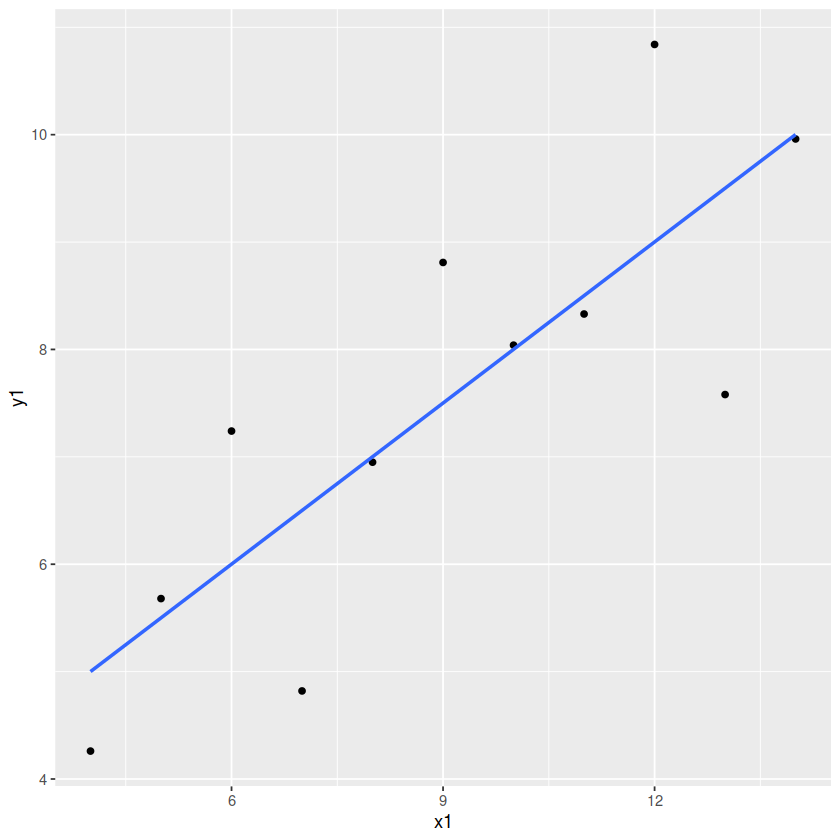

In [9]:
ggplot(ans, aes(x = x1, y = y1))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'



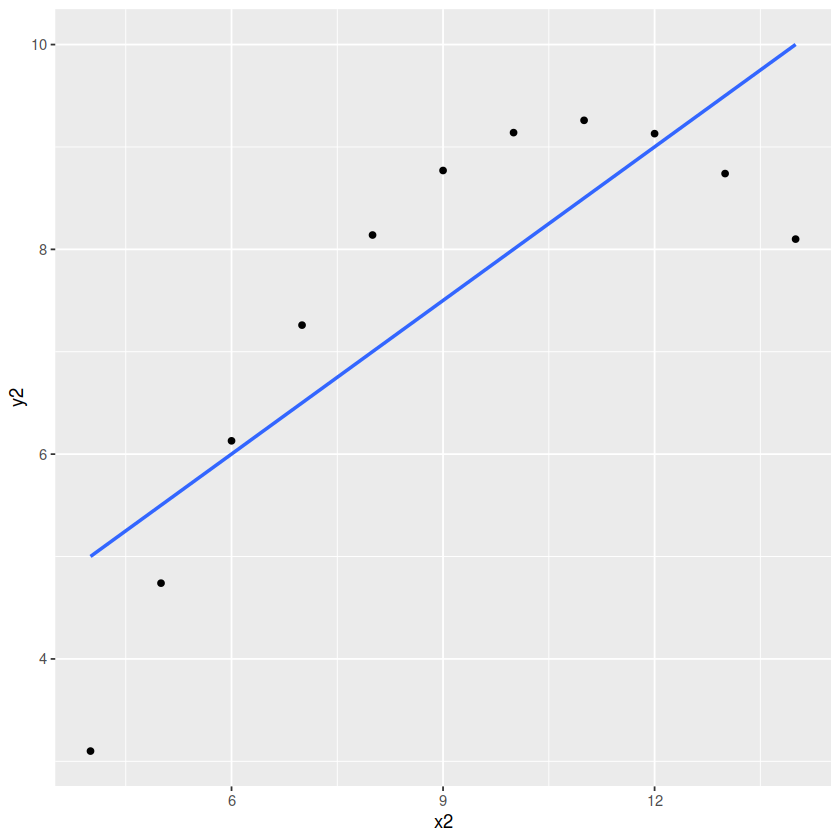

In [10]:
ggplot(ans, aes(x = x2, y = y2))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

In [11]:
# yt
mod3 <- lm(y3 ~ x3, data = ans)
mod4 <- lm(y4 ~ x4, data = ans)

In [12]:
texreg(list(mod3, mod4),
      custom.model.names = c("mod1", "mod2"),
      caption = "Regression of y1 on x1 and y2 on x2",
      caption.above = TRUE)

\begin{table}
\caption{Regression of y1 on x1 and y2 on x2}
\begin{center}
\begin{tabular}{l c c}
\hline
 & mod1 & mod2 \\
\hline
(Intercept) & $3.00^{*}$  & $3.00^{*}$  \\
            & $(1.12)$    & $(1.12)$    \\
x3          & $0.50^{**}$ &             \\
            & $(0.12)$    &             \\
x4          &             & $0.50^{**}$ \\
            &             & $(0.12)$    \\
\hline
R$^2$       & $0.67$      & $0.67$      \\
Adj. R$^2$  & $0.63$      & $0.63$      \\
Num. obs.   & $11$        & $11$        \\
\hline
\multicolumn{3}{l}{\scriptsize{$^{***}p<0.001$; $^{**}p<0.01$; $^{*}p<0.05$}}
\end{tabular}
\label{table:coefficients}
\end{center}
\end{table}

`geom_smooth()` using formula 'y ~ x'



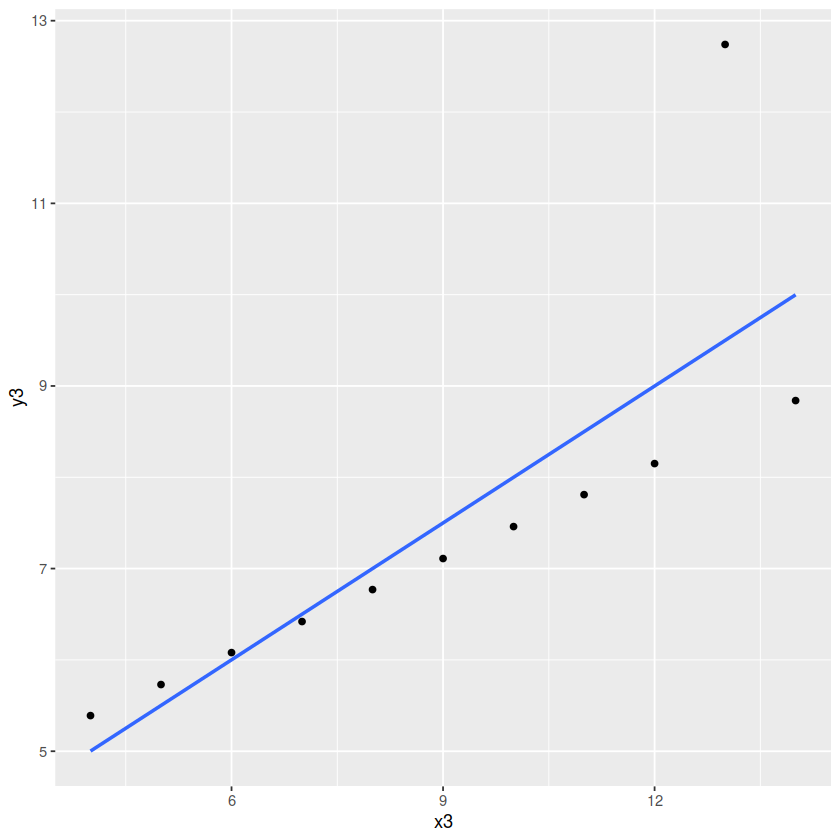

In [13]:
ggplot(ans, aes(x = x3, y = y3))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'



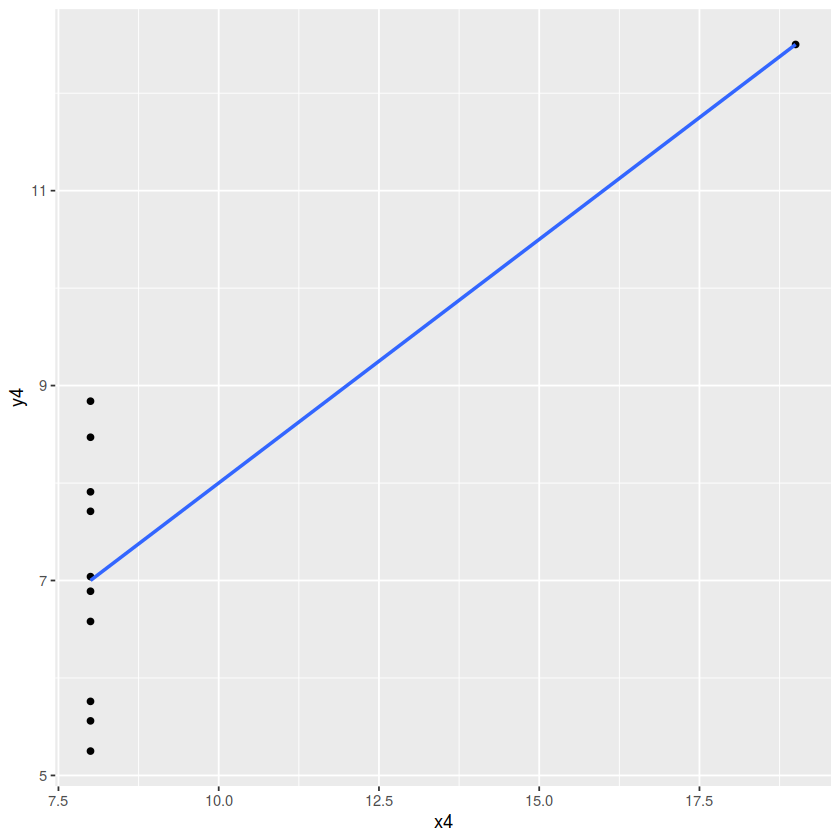

In [14]:
ggplot(ans, aes(x = x4, y = y4))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

# Example: Carbon and Livelihoods Data

In [4]:
ifri <- read_csv("data//ifri_car_liv.csv")
head(ifri)

Parsed with column specification:
cols(
  forest_id = col_double(),
  cid = col_character(),
  zliv = col_double(),
  zbio = col_double(),
  livcar1 = col_double(),
  ownstate = col_double(),
  distance = col_double(),
  sadmin = col_double(),
  rulematch = col_double(),
  lnfsize = col_double()
)



forest_id cid zliv       zbio       livcar1 ownstate distance sadmin
1 217       NEP -0.6139841 -0.4509847 3       1        2         0    
2 325       IND -0.6538849 -0.3653702 3       1        1         1    
3  88       UGA -0.3383080 -0.9703643 3       1        1         3    
4 174       NEP -0.7855347 -1.3251940 3       1        2        26    
5 240       NEP -0.4502251 -1.0492220 3       1        2         3    
6 287       TAN -0.1834945 -0.8323973 3       1        1        40    
  rulematch lnfsize 
1 0         4.430817
2 0         8.196712
3 0         4.941642
4 0         5.288267
5 1         4.343805
6 1         6.214608

In [5]:
ifri[79:81,]

forest_id cid zliv      zbio       livcar1 ownstate distance sadmin rulematch
1 281       MAD 0.6724731 -0.1842079  4       1        3        0      1       
2 169       NEP 1.2154060 -1.1021430  4       1        1        0      1       
3  NA       NA         NA         NA NA      NA       NA       NA     NA       
  lnfsize 
1 7.600903
2 4.663439
3       NA

In [6]:
# only 80 rows of data
ifri <- ifri[1:80,]
tail(ifri)

forest_id cid zliv       zbio       livcar1 ownstate distance sadmin
1 302       KEN  1.2584510  0.5768041 2       1        1         2    
2 317       BHU  1.6850010 -0.0975501 4       1        1        22    
3  64       UGA -1.0901630 -0.1148645 3       0        2         3    
4 326       IND  1.1197360  1.3140480 2       1        1        19    
5 281       MAD  0.6724731 -0.1842079 4       1        3         0    
6 169       NEP  1.2154060 -1.1021430 4       1        1         0    
  rulematch lnfsize 
1 0         9.608781
2 1         5.161925
3 0         3.688879
4 0         9.222566
5 1         7.600903
6 1         4.663439

In [7]:
# rename
ifri <- ifri %>%
    rename(carbon = zbio, liveli = zliv)

In [8]:
head(ifri)

forest_id cid liveli     carbon     livcar1 ownstate distance sadmin
1 217       NEP -0.6139841 -0.4509847 3       1        2         0    
2 325       IND -0.6538849 -0.3653702 3       1        1         1    
3  88       UGA -0.3383080 -0.9703643 3       1        1         3    
4 174       NEP -0.7855347 -1.3251940 3       1        2        26    
5 240       NEP -0.4502251 -1.0492220 3       1        2         3    
6 287       TAN -0.1834945 -0.8323973 3       1        1        40    
  rulematch lnfsize 
1 0         4.430817
2 0         8.196712
3 0         4.941642
4 0         5.288267
5 1         4.343805
6 1         6.214608

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



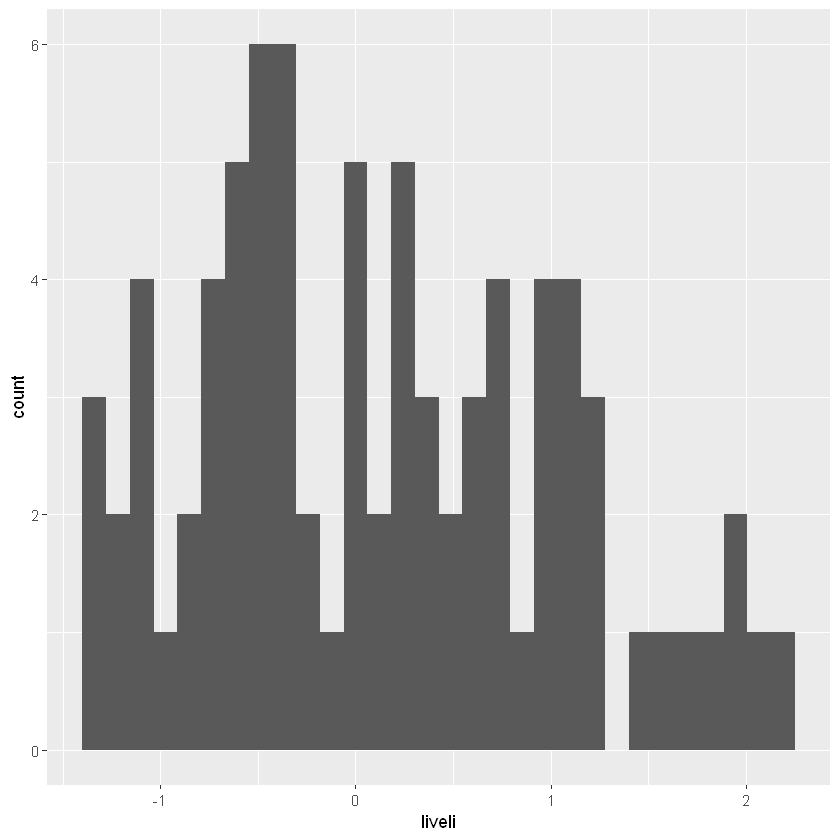

In [9]:
ggplot(ifri, aes(x = liveli))+
    geom_histogram()

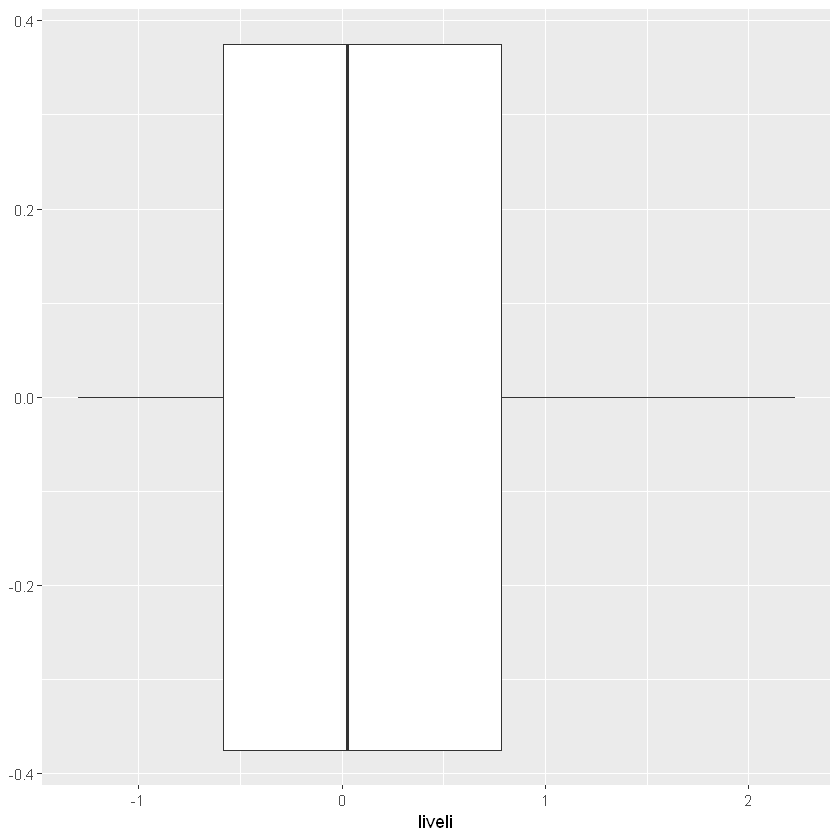

In [10]:
ggplot(ifri, aes(y = liveli))+
    geom_boxplot()+
    coord_flip()

`geom_smooth()` using formula 'y ~ x'



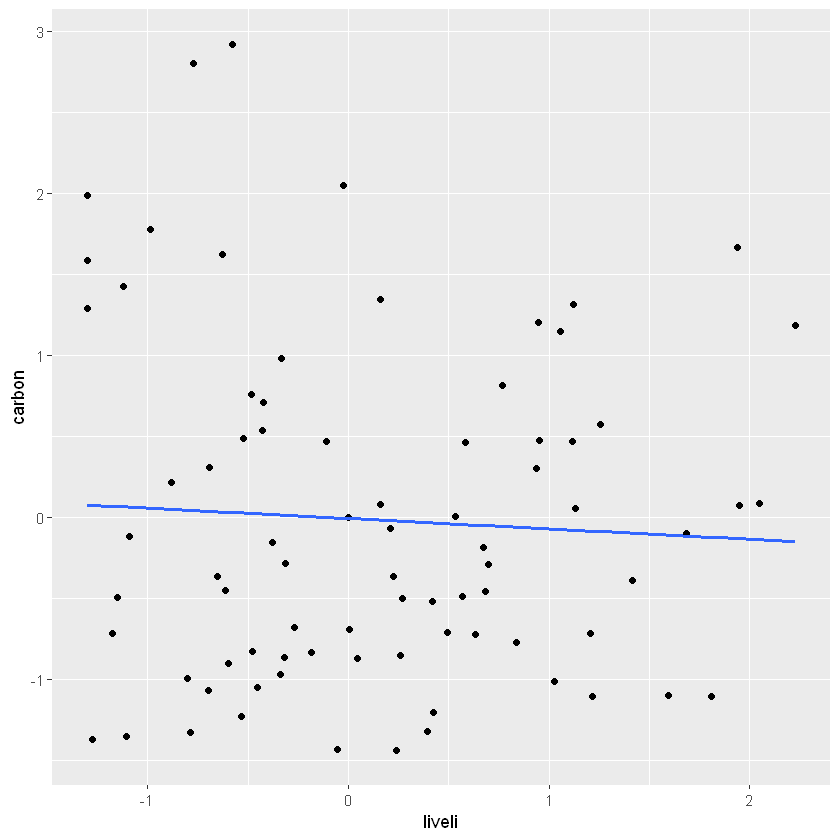

In [11]:
# scatter plot carbon vs livelihoods
ggplot(ifri, aes(x = liveli, y = carbon))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

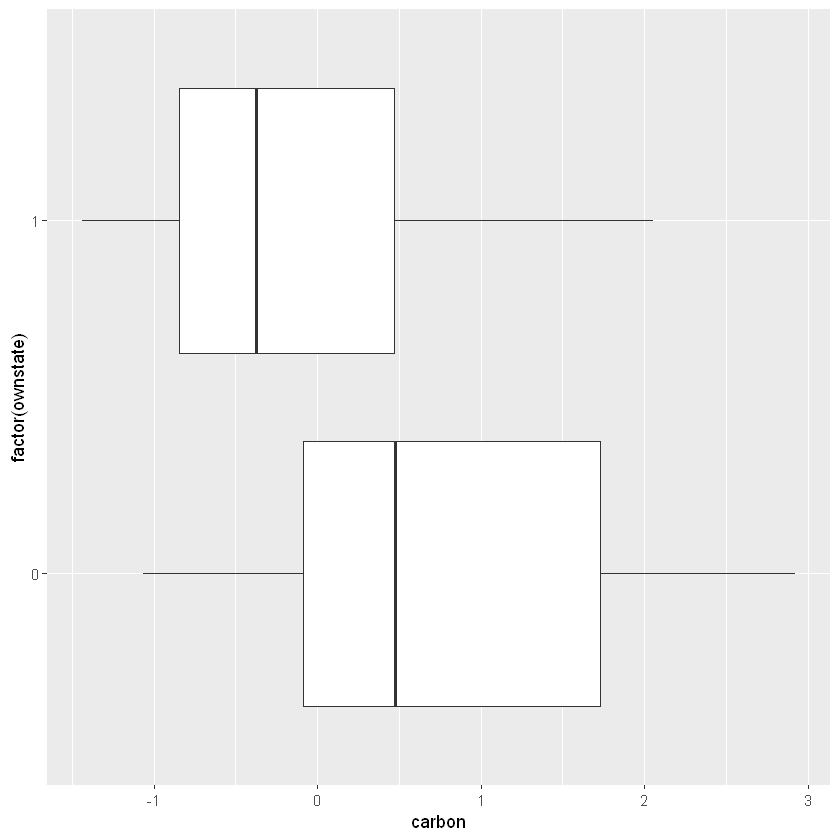

In [12]:
# How carbon and livelihoods are related to ownership
ggplot(ifri, aes(x = factor(ownstate), y = carbon))+
    geom_boxplot()+
    coord_flip()

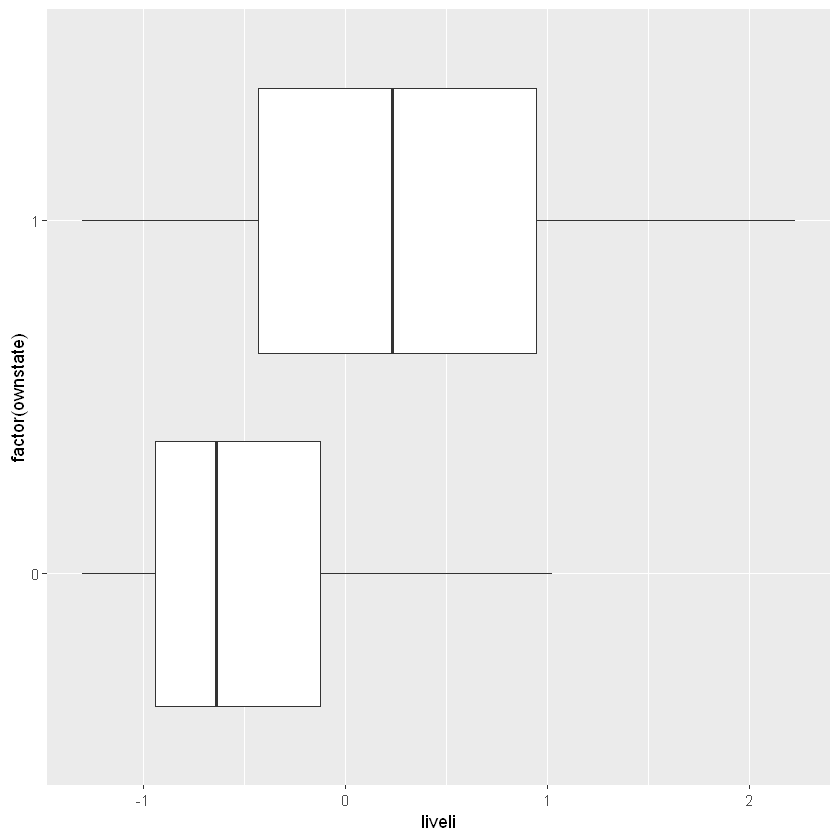

In [13]:
ggplot(ifri, aes(x = factor(ownstate), y = liveli))+
    geom_boxplot()+
    coord_flip()

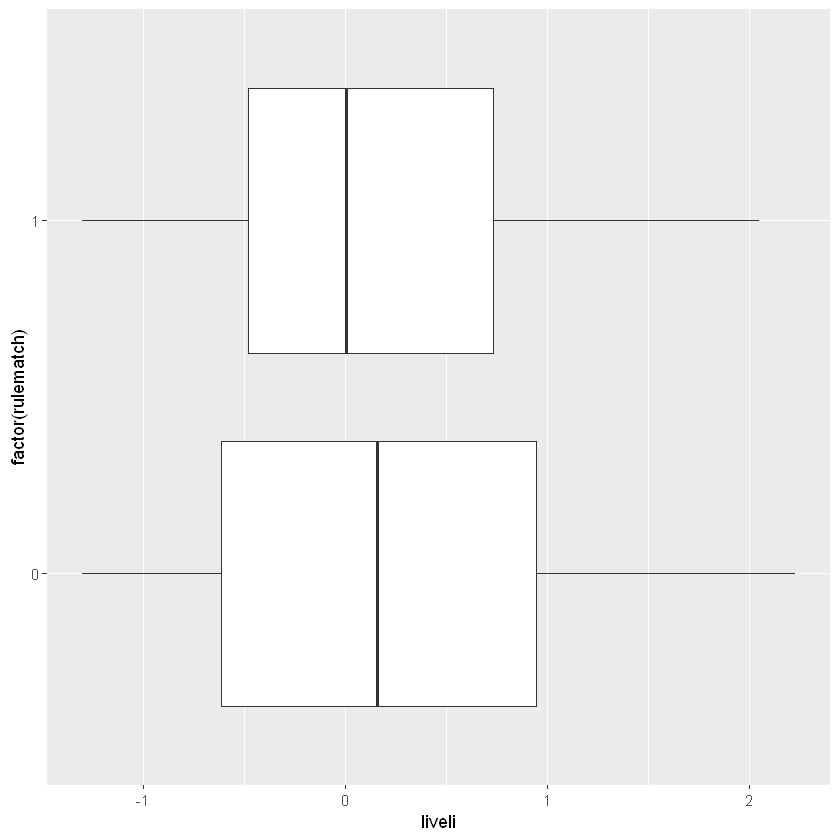

In [14]:
ggplot(ifri, aes(x = factor(rulematch), y = liveli))+
    geom_boxplot()+
    coord_flip()

In [16]:
ifri2 <-  ifri %>% mutate(f_own_rule = 
                        ifelse(ownstate  == 1 & rulematch == 0, "State_low",
                        ifelse(ownstate == 1 & rulematch == 0, "State_high",
                        ifelse(ownstate == 0 & rulematch == 1, "Com_high",
                        "Com_low"))))

`geom_smooth()` using formula 'y ~ x'



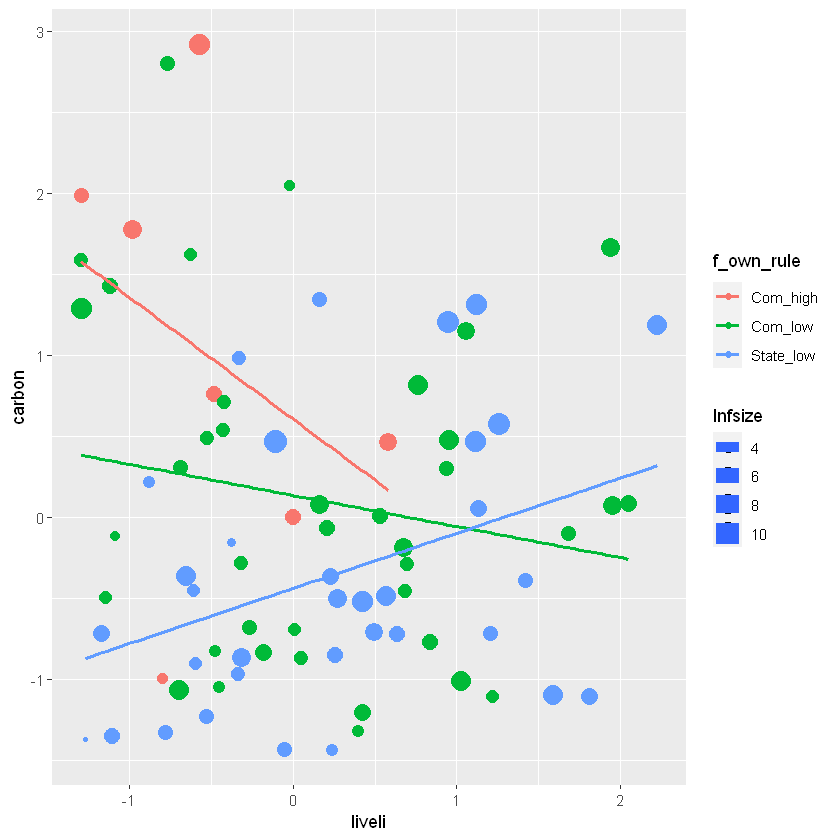

In [18]:
# Relationship between carbon & livelihoods
# While incorporating
# 1. Forest size (size of bubbles)
# 2. ownership
# 3. rule match in the plot
ggplot(ifri2, aes(x = liveli, y = carbon, size = lnfsize, colour = f_own_rule))+
    geom_point()+
    geom_smooth(method = "lm", se = F)